# WeatherPy

In [2]:
# Dependencies and Setup
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random
# import openweathermapy as ow

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
    

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

In [4]:
# Look at how the city dictionary is set up in the openweathermapy api
#units = imperial for temp in F and wind speed in mph
find_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="
response = requests.get(find_url + api_key +"&q=tabou").json()
response

{'coord': {'lon': -7.36, 'lat': 4.42},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10n'}],
 'base': 'stations',
 'main': {'temp': 73.49,
  'pressure': 1015.04,
  'humidity': 94,
  'temp_min': 73.49,
  'temp_max': 73.49,
  'sea_level': 1015.04,
  'grnd_level': 1011.92},
 'wind': {'speed': 3.22, 'deg': 161.691},
 'rain': {'3h': 0.562},
 'clouds': {'all': 97},
 'dt': 1561616241,
 'sys': {'message': 0.0061,
  'country': 'CI',
  'sunrise': 1561616463,
  'sunset': 1561661016},
 'timezone': 0,
 'id': 2281120,
 'name': 'Tabou',
 'cod': 200}

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="
check_url = f"{url}{api_key}&q="

max_temp_f = []
humid = []
cloud = []
wind_mph = []
country = []
date = []
lat = []
long = []
name = []

count = 0

for city in cities:
    try:
        response = requests.get(check_url + city).json()
        count +=1
        max_temp_f.append(response['main']['temp_max'])
        humid.append(response['main']['humidity'])
        cloud.append(response ['clouds']['all'])
        wind_mph.append(response ['wind']['speed'])
        country.append(response ['sys']['country'])
        date.append(response ['dt'])
        lat.append(response ['coord']['lat'])
        long.append(response ['coord']['lon'])
        name.append(response['name'])


        print(f"Processing Record {count} | {city}")
    except KeyError:
        print("City not found. Skipping...")

    
    
    

Processing Record 1 | rikitea
Processing Record 2 | hermanus
Processing Record 3 | kodiak
Processing Record 4 | black river
Processing Record 5 | marzuq
Processing Record 6 | alexandria
Processing Record 7 | pierre
Processing Record 8 | mataura
Processing Record 9 | pleasanton
Processing Record 10 | hilo
Processing Record 11 | busselton
Processing Record 12 | dikson
Processing Record 13 | upernavik
Processing Record 14 | lebu
Processing Record 15 | paamiut
Processing Record 16 | caravelas
Processing Record 17 | skibbereen
Processing Record 18 | albany
Processing Record 19 | tura
Processing Record 20 | punta arenas
Processing Record 21 | ushuaia
Processing Record 22 | khatanga
Processing Record 23 | mikhaylovskoye
Processing Record 24 | hami
Processing Record 25 | yellowknife
Processing Record 26 | san vicente
Processing Record 27 | klaksvik
Processing Record 28 | harper
Processing Record 29 | saint george
Processing Record 30 | chuy
City not found. Skipping...
Processing Record 32 | ai

Processing Record 253 | soyo
Processing Record 254 | itarema
Processing Record 255 | sambava
Processing Record 256 | dunedin
Processing Record 257 | chapais
Processing Record 258 | laguna
Processing Record 259 | santa maria
Processing Record 260 | erzin
Processing Record 261 | gao
Processing Record 262 | perigueux
City not found. Skipping...
Processing Record 264 | cam ranh
Processing Record 265 | san cristobal
Processing Record 266 | kieta
Processing Record 267 | ostrovnoy
City not found. Skipping...
City not found. Skipping...
Processing Record 270 | carnarvon
Processing Record 271 | alta floresta
Processing Record 272 | kovur
Processing Record 273 | ayr
Processing Record 274 | kuhdasht
Processing Record 275 | codrington
Processing Record 276 | ixtapa
Processing Record 277 | denton
Processing Record 278 | port elizabeth
Processing Record 279 | guerrero negro
Processing Record 280 | port macquarie
City not found. Skipping...
Processing Record 282 | zabaykalsk
Processing Record 283 | o

Processing Record 506 | pilar
Processing Record 507 | aleksandrovskiy zavod
Processing Record 508 | gold coast
Processing Record 509 | port augusta
Processing Record 510 | carutapera
City not found. Skipping...
Processing Record 512 | gornozavodsk
Processing Record 513 | hay river
Processing Record 514 | lebedinyy
Processing Record 515 | khapa
Processing Record 516 | kogon
Processing Record 517 | nantucket
City not found. Skipping...
Processing Record 519 | darhan
Processing Record 520 | jimeta
Processing Record 521 | woodland
Processing Record 522 | coquimbo
Processing Record 523 | kozhva
Processing Record 524 | te anau
Processing Record 525 | paramonga
Processing Record 526 | nanpiao
City not found. Skipping...
Processing Record 528 | kalispell
Processing Record 529 | upata
Processing Record 530 | waingapu
Processing Record 531 | marienburg
Processing Record 532 | kautokeino
Processing Record 533 | camacha
Processing Record 534 | saurimo
Processing Record 535 | provideniya
City not f

In [6]:
weather_dict = {
    "City": name,
    "Cloudiness": cloud,
    "Country": country,
    "Date": date,
    "Humidity": humid,
    "Lat": lat,
    "Lng": long,
    "Max Temp": max_temp_f,
    "Wind Speed": wind_mph
}

weather_df = pd.DataFrame(weather_dict)

weather_df.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Rikitea,0,PF,1561616245,82,-23.12,-134.97,74.21,12.19
1,Hermanus,22,ZA,1561616245,98,-34.42,19.24,55.99,10.65
2,Kodiak,1,US,1561616246,60,39.95,-94.76,77.00,8.05
3,Black River,20,JM,1561616246,78,18.03,-77.85,82.40,9.17
4,Marzuq,92,YE,1561616246,14,14.40,46.47,90.59,7.81


In [8]:
# Save Data to csv
weather_df.to_csv(output_data_file)

In [9]:
weather_df.count()

City          551
Cloudiness    551
Country       551
Date          551
Humidity      551
Lat           551
Lng           551
Max Temp      551
Wind Speed    551
dtype: int64

### Plotting the Data

Your objective is to build a series of scatter plots to showcase the following relationships:
* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

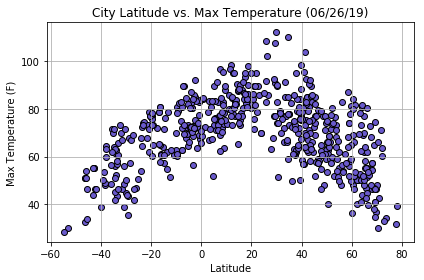

In [11]:
# Set x axis 
lat_axis = lat

#create scatter plot
plt.scatter(lat_axis, max_temp_f, marker="o", facecolors="slateblue", edgecolors="black")
plt.grid()
#add labels, titles, 
plt.title("City Latitude vs. Max Temperature (06/26/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.tight_layout()

#save figure
plt.savefig("Images/LatvsTemp.png")
plt.show()


#### Latitude vs. Humidity Plot

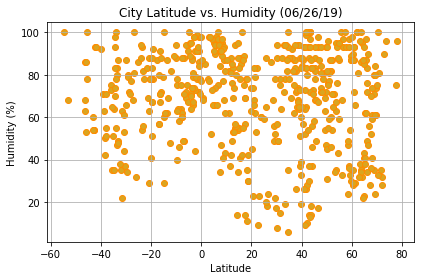

In [12]:
# Set x axis 
lat_axis = lat

#create scatter plot
plt.scatter(lat_axis, humid, marker="o", facecolors="goldenrod", edgecolors="darkorange")
plt.grid()
#add labels, titles, 
plt.title("City Latitude vs. Humidity (06/26/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.tight_layout()

# save figure
plt.savefig("Images/LatvsHumidity.png")
plt.show()


#### Latitude vs. Cloudiness Plot

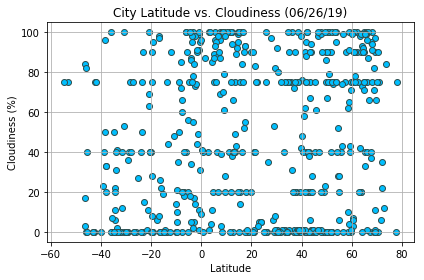

In [13]:
# Set x axis 
lat_axis = lat

#create scatter plot
plt.scatter(lat_axis, cloud, marker="o", facecolors="deepskyblue", edgecolors="darkslategrey")
plt.grid()
#add labels, titles, 
plt.title("City Latitude vs. Cloudiness (06/26/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.tight_layout()
# plt.xlim(min(lat)-5,max(lat)+5)
# plt.ylim(min(wind_mph)-5,wind_mph+5)

# save figure
plt.savefig("Images/LatvsCloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

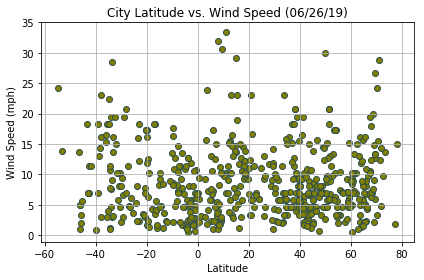

In [14]:
# Set x axis 
lat_axis = lat

#create scatter plot
plt.scatter(lat_axis, wind_mph, marker="o", facecolors="olive", edgecolors="darkslategrey")
plt.grid()
#add labels, titles, 
plt.title("City Latitude vs. Wind Speed (06/26/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.tight_layout()
# plt.xlim(min(lat)-5,max(lat)+5)
# plt.ylim(min(wind_mph)-5,wind_mph+5)

# save figure
plt.savefig("Images/LatvsWindSpeed.png")
plt.show()

### Analysis
The Latitude vs. Max Temperature shows an arc where the lowest max temps occur on the min and max latitudes, where they are furthest from the equator. However the highest temperatures are around 23.5 N latitude which is knowns as the Tropic of Cancer and may be due to the tilt in the Earths Axis. Latitude does not seem to affect humidity percentages, cloudiness or wind speed. 
